In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install scipy
!pip3 install matplotlib

In [160]:
import pandas as pd
import numpy as np

In [161]:
df1 = pd.read_csv('../processed_data/Ireland_Data.csv', encoding="utf8")
df2 = pd.read_csv('../processed_data/Fayetville_Data.csv', encoding="utf8")
df3 = pd.read_csv('../processed_data/Post-Fayetville_Data.csv', encoding="utf8")

In [162]:
dataframes = [df1, df2, df3]
combined = pd.concat(dataframes)

In [163]:
combined = combined.drop(['Unnamed: 0'], axis=1)

In [164]:
import ast
def string_to_floats(input_string):
    # Convert the string representation of the list to an actual list
    float_list = ast.literal_eval(input_string)
    # Ensure the result is a list of floats
    return [float(item) for item in float_list]

In [165]:
combined['Date'] = combined['Date'].astype(str)
combined['Exercise'] = combined['Exercise'].astype(str)
combined['Notes'] = combined['Notes'].astype(str)
combined['Mobility'] = combined['Mobility'].astype(str)

combined['Weights'] = combined['Weights'].apply(string_to_floats)
combined['Reps'] = combined['Reps'].apply(string_to_floats)

In [166]:
combined

,Date,Exercise,Weights,Sets,Reps,RPE,Notes,Mobility
0,5/31/19,dips,[45.0],[3],[8.0],[None],very difficult rpe10 every set,nan
1,6/2/19,tng bench,[185.0],[3],[10.0],[None],rpe6 sleeved without much leg drive and qualit...,nan
2,6/2/19,beltless high bar,[275.0],[3],[8.0],[None],"feels very good considering sleep schedule, rpe8",nan
3,6/3/19,comp bench,[195.0],[3],[10.0],[None],rpe8 good and smooth,nan
4,6/3/19,pause beltless sumo deadlift,"[425.0, 375.0]","[1, 4]","[1.0, 5.0]","[None, None]",smooth but heavy,nan
...,...,...,...,...,...,...,...,...
101,8/3/20,comp bench,"[295.0, 255.0]","[1, 4]","[1.0, 5.0]","[7.0, 7.0]",either only have primer singles the day before...,"mobility, warmup"
102,8/5/20,comp deadlift,[425.0],[3],[7.0],[None],fucking tiring,"56cal 10min bike ride warmup, mobility, warmup"
103,8/5/20,spoto press,[245.0],[4],[3.0],[None],money and no tendonitis,"56cal 10min bike ride warmup, mobility, warmup"
104,8/7/20,pause comp squat,[425.0],[1],[1.0],[7.5],"8, 365x3x3 / flats for first time and feel great","58cal 10min bike ride warmup, mobility, warmup"


In [182]:
def epleyE1rmCalc(weight, reps):
    return weight * (1 + 0.0333 * reps)
def landerE1rmCalc(weight, reps):
    return (100 * weight) / (101.3 - 2.67123 * reps)
def lombardiE1rmCalc(weight, reps):
    return weight * reps**0.1

C:\Users\Grant\AppData\Local\Temp\ipykernel_6764\800555246.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(dates)
C:\Users\Grant\AppData\Local\Temp\ipykernel_6764\800555246.py:67: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(dates, lombardiE1rm, s=100, edgecolor='k', marker='+', color='green')


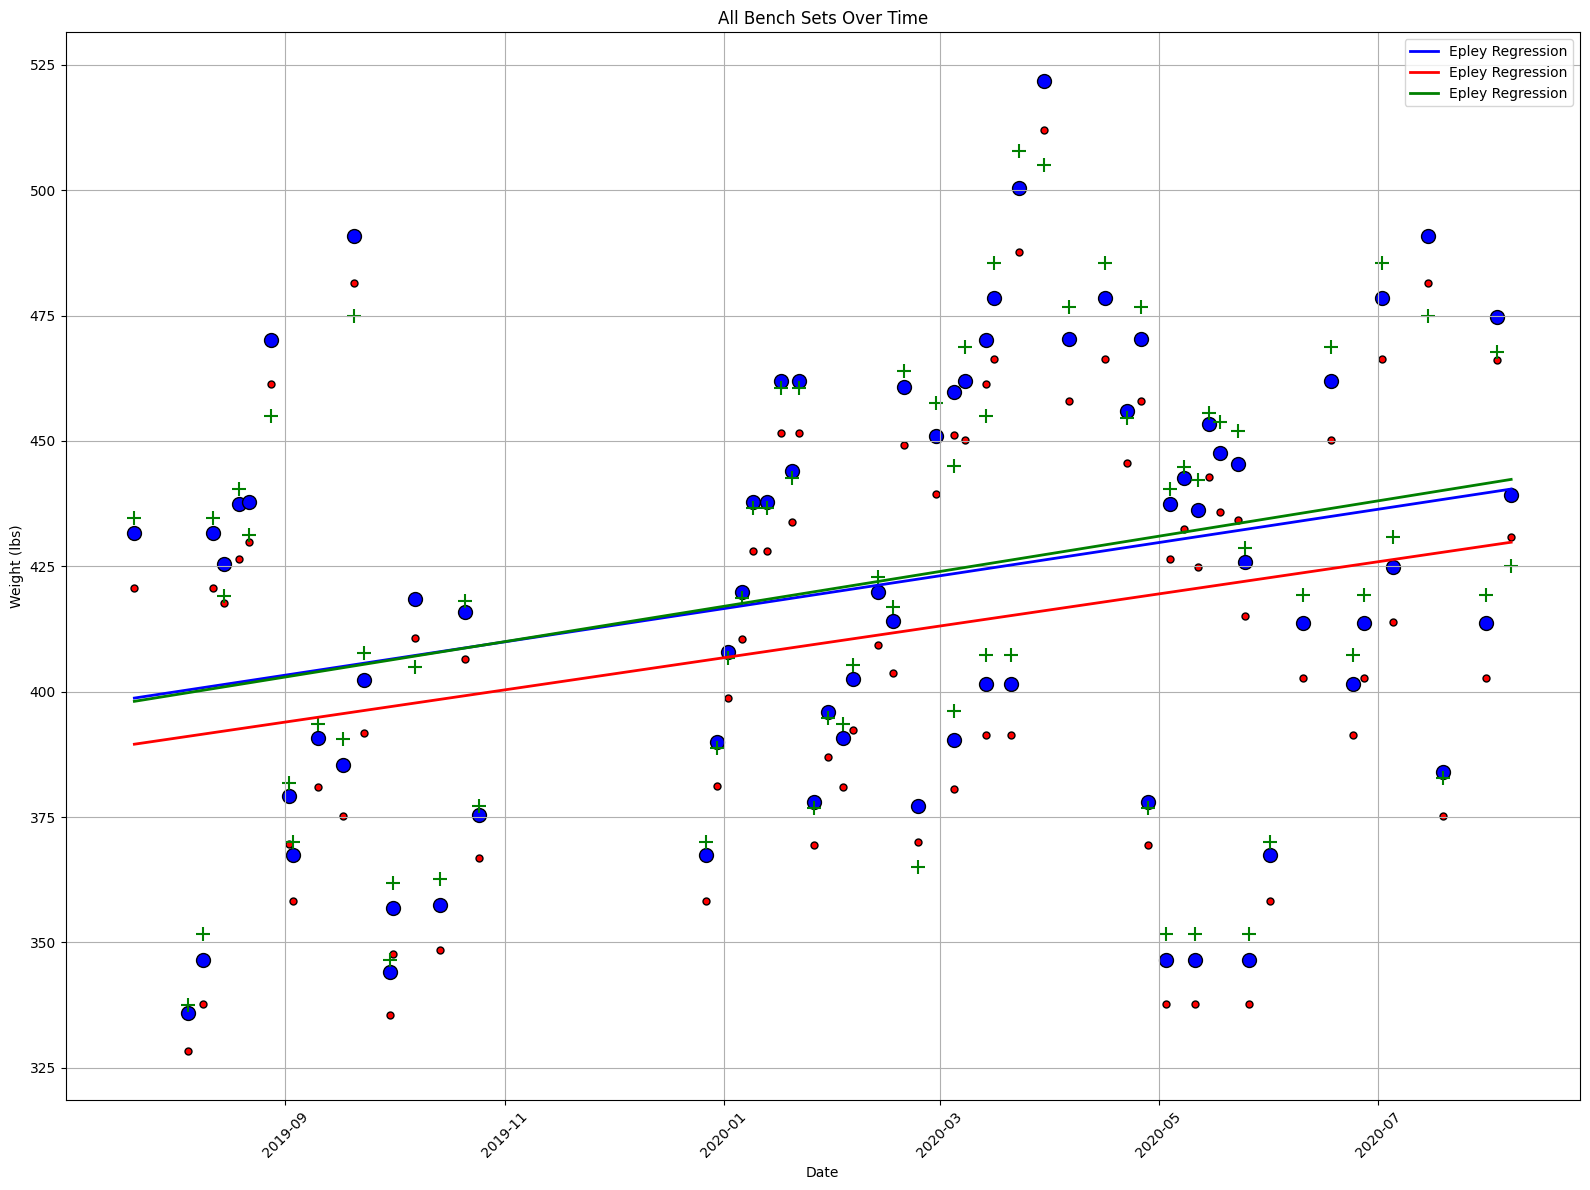

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

epleyE1rm = []
landerE1rm = []
lombardiE1rm = []

# Filter the DataFrame for 'bench' related exercises, assuming all variations contain "comp bench"
df = combined[combined['Exercise'].str.contains('comp squat', case=False, na=False)]

# Prepare lists to store plot data
dates = []
weights = []
reps = []

# Iterate over the filtered DataFrame
for index, row in df.iterrows():
    # print(row)
    # Check each weight and corresponding rep count
    for weight, rep in zip(row['Weights'], row['Reps']):
        epley_preds = []
        lander_preds = []
        lombardi_preds = []
        if rep > 0 and weight > 0:  # Only consider reps greater than zero
            weights.append(weight)
            reps.append(rep)
            epley_preds.append(epleyE1rmCalc(weight, rep))
            lander_preds.append(landerE1rmCalc(weight, rep))
            lombardi_preds.append(lombardiE1rmCalc(weight, rep))

    # print(epley_preds, lander_preds, lombardi_preds)
    if(len(epley_preds) > 0):
        dates.append(row['Date'])
        epleyE1rm.append(max(epley_preds))
        landerE1rm.append(max(lander_preds))
        lombardiE1rm.append(max(lombardi_preds))

# Convert dates for plotting
dates = pd.to_datetime(dates)
# print('after', inclineDates)
date_nums = date2num(dates)  # Convert dates to ordinal numbers for regression

# Use a colormap to vary colors based on the number of reps
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(min(reps), max(reps))

# Compute linear regression for Epley
slope, intercept = np.polyfit(date_nums, epleyE1rm, 1)
regression_line1 = slope * date_nums + intercept

# Compute linear regression for Lander
slope, intercept = np.polyfit(date_nums, landerE1rm, 1)
regression_line2 = slope * date_nums + intercept

# Compute linear regression for Lombardi
slope, intercept = np.polyfit(date_nums, lombardiE1rm, 1)
regression_line3 = slope * date_nums + intercept


# Plotting
plt.figure(figsize=(16, 12))

plt.scatter(dates, epleyE1rm, s=100, edgecolor='k', marker='o', color='blue')
plt.scatter(dates, landerE1rm, s=100, edgecolor='k', marker='.', color='red')
plt.scatter(dates, lombardiE1rm, s=100, edgecolor='k', marker='+', color='green')

plt.plot(dates, regression_line1, color='blue', linewidth=2, label='Epley Regression')  # Add regression line
plt.plot(dates, regression_line2, color='red', linewidth=2, label='Epley Regression')  # Add regression line
plt.plot(dates, regression_line3, color='green', linewidth=2, label='Epley Regression')  # Add regression line

plt.title('All Bench Sets Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
# plt.colorbar(scatter, label='Number of Reps')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [168]:
combined.to_csv("../processed_data/Combined_Data.csv")